# Análisis exploratorio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/clientes.csv", sep = ',', encoding ='latin-1')

Próximamente procedemos a realizar una presentación de los primeros 5 datos, para visualizar los valores que puede llegar a tomar cada variable y a la vez determinar los campos a conservar, modificar y eliminar.


In [ ]:
data.head()

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Ocupacion,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
0,20887,206,Damien,Li,04/07/1966,S,M,damien2@mineriadedatos.com.ar,10000.0,4,...,Obrero,1,1,'2 route de Marseille','500 555-0159',13/05/2008,'0-1 Km.',Centro,46,1
1,29319,14,Alvin,Pal,14/07/1957,S,M,alvin34@mineriadedatos.com.ar,70000.0,1,...,'Obrero especializado',0,1,'5323 Stanford St','500 555-0127',03/11/2007,'0-1 Km.',Sur,55,1
2,20716,157,Kristina,Arun,13/09/1973,C,F,kristina7@mineriadedatos.com.ar,40000.0,1,...,'Obrero especializado',1,1,'Waldstr 29','500 555-0186',05/11/2006,'0-1 Km.',Centro,39,1
3,20381,627,Blake,Bennett,07/06/1938,C,M,blake49@mineriadedatos.com.ar,60000.0,3,...,GestiÃ³n,1,2,'7310 Heather Road',590-555-0124,02/05/2008,'10+ Km.',Norte,74,0
4,15013,329,Julia,Campbell,13/11/1976,S,F,julia6@mineriadedatos.com.ar,60000.0,0,...,'Obrero especializado',0,2,'6258 Stinson',606-555-0185,04/11/2007,'1-2 Km.',Norte,36,0


Descartaremos aquellas variables que consideramos que no son necesarias para resolver los objetivos y no nos aportan valor:
*   IdCliente e IdCiudad: Son datos únicos para cada observación y no aportan información. Para el caso de IdCiudad tampoco disponemos de un dataset con la información de que ciudad corresponde al ID.
*   Direccion, Telefono, Nombre, Apellido, Email: No aportan información adicional solo sirven como identificación del cliente.
*   FechaNacimiento: Es redundante ya que se tiene el campo Edad.



In [ ]:
data = data.drop(['IdCliente', 'Nombre','Apellido','FechaNacimiento','Email','Telefono','IdCiudad','Direccion', 'FechaPrimeraCompra'], axis=1)

Convertiremos la variable ComproBicicleta y Propietario a una booleana, esto nos será util para la realización de los gráficos.

In [ ]:
data.ComproBicicleta = data.ComproBicicleta.astype(bool)
data.ComproBicicleta = data.ComproBicicleta.astype(str)

data.Propietario = data.Propietario.astype(bool)
data.Propietario = data.Propietario.astype(str)

Debajo veremos que efectivamente se descartaron las variables que se deseaban eliminar, y por otro lado se modifico correctamente el tipo de la variable ComproBicicleta.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6400 non-null   object 
 1   Genero           6400 non-null   object 
 2   IngresoAnual     6390 non-null   float64
 3   TotalHijos       6400 non-null   int64  
 4   Educacion        6400 non-null   object 
 5   Ocupacion        6400 non-null   object 
 6   Propietario      6400 non-null   object 
 7   CantAutomoviles  6400 non-null   int64  
 8   Distancia        6400 non-null   object 
 9   Region           6400 non-null   object 
 10  Edad             6400 non-null   int64  
 11  ComproBicicleta  6400 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 600.1+ KB


Esta tabla muestra los campos, la cantidad de datos que posee cada uno y el tipo de dato que comprende. Es muy útil ya que especifica si hay valores faltantes en el conjunto de datos

En este caso se puede visualizar la falta de 10 datos en el ingreso anual. Esto lo tendremos en cuenta más adelante durante el proceso de limpieza de datos.

## Medidas de posición

La siguiente tabla proporciona estadísticas resumidas sobre datos numéricos que puede ayudar a detectar algunos tipos de errores y valores atípicos (outliers), como valores atípicos extremos en el min y max, errores de ingreso, valores faltantes, entre otros.

In [ ]:
data.describe()

,IngresoAnual,TotalHijos,CantAutomoviles,Edad
count,6390.000000,6400.000000,6400.000000,6400.000000
mean,57532.081377,1.894844,1.547656,51.195469
std,32331.969091,1.630993,1.147060,11.517698
min,10000.000000,0.000000,0.000000,32.000000
25%,30000.000000,0.000000,1.000000,42.000000
50%,60000.000000,2.000000,2.000000,49.000000
75%,70000.000000,3.000000,2.000000,59.000000
max,170000.000000,5.000000,4.000000,102.000000


Además de los 10 valores faltantes en IngresoAnual antes mencionado, el resto de los valores parecen ser coherentes y no se detectan outliers evidentes.

In [ ]:
data.std(numeric_only=True)

IngresoAnual       32331.969091
TotalHijos             1.630993
CantAutomoviles        1.147060
Edad                  11.517698
dtype: float64

Esta última tabla, muestra información de los desvíos estandar, que si bien no es útil en esta etapa de Análisis, sí lo tendremos en cuenta más adelante en el trabajo cuando empecemos a crear los diferentes modelos predictivos, ya que habrá que estandarizar las unidades de cada variable.

##Analisis Univariante

### Estado Civil
Variable cualitativa categórica

Al ser una variable cualitativa, utilizaremos para esta y las demás un gráfico de barras para respresentar la cantidad de valores para cada categoría de la variable y a partir de ello hacer su respectivo análisis

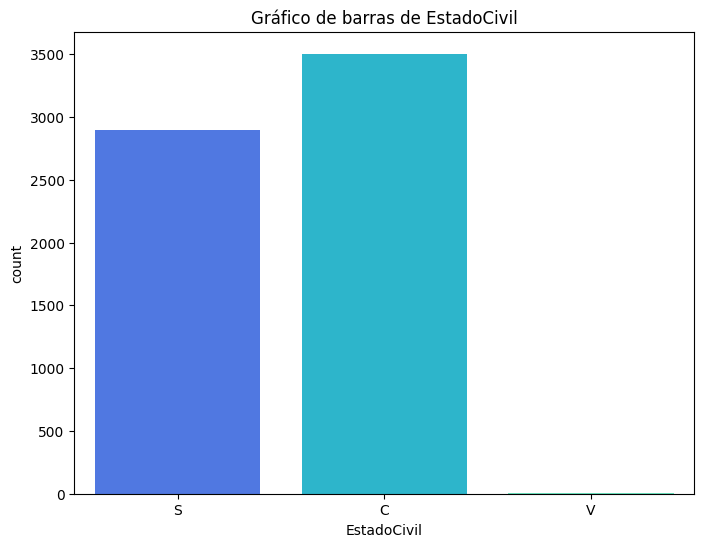

In [ ]:
sns.set_palette("rainbow")
fig,ax = plt.subplots(figsize=(8,6))

sns.countplot(x ='EstadoCivil', data = data)

#titulo
ax.title.set_text("Gráfico de barras de EstadoCivil")


In [ ]:
data.EstadoCivil.value_counts()

C    3504
S    2894
V       2
Name: EstadoCivil, dtype: int64

En este gráfico podemos concluir que la distribución de los datos entre los solteros y los casados es similar, sin embargo los casados son más.
En el gráfico de barras no se puede visualizar la cantidad de viudos porque es muy inferior con respecto a los otros dos valores posibles vistos.

### Género
Variable cualitativa categórica

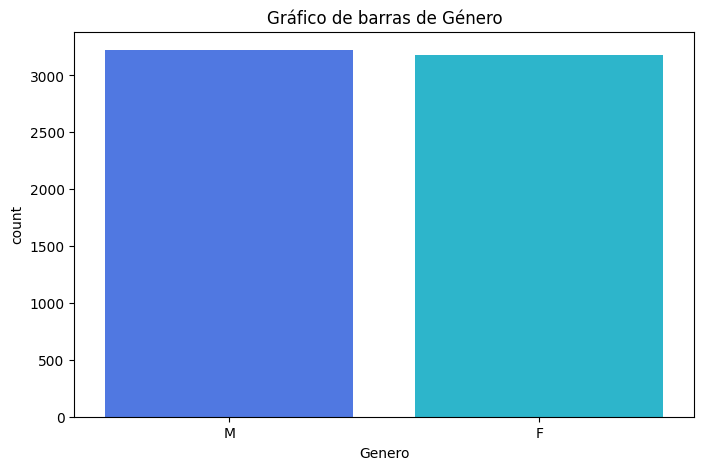

In [ ]:
sns.set_palette("rainbow")
fig,ax = plt.subplots(figsize=(8,5))

sns.countplot(x ="Genero", data = data)

#titulo
ax.title.set_text("Gráfico de barras de Género")

In [ ]:
data.Genero.value_counts()

M    3223
F    3177
Name: Genero, dtype: int64

Se puede observar que la cantidad de registros de ambos géneros son similares.

### Educación
Variable cualitativa categórica

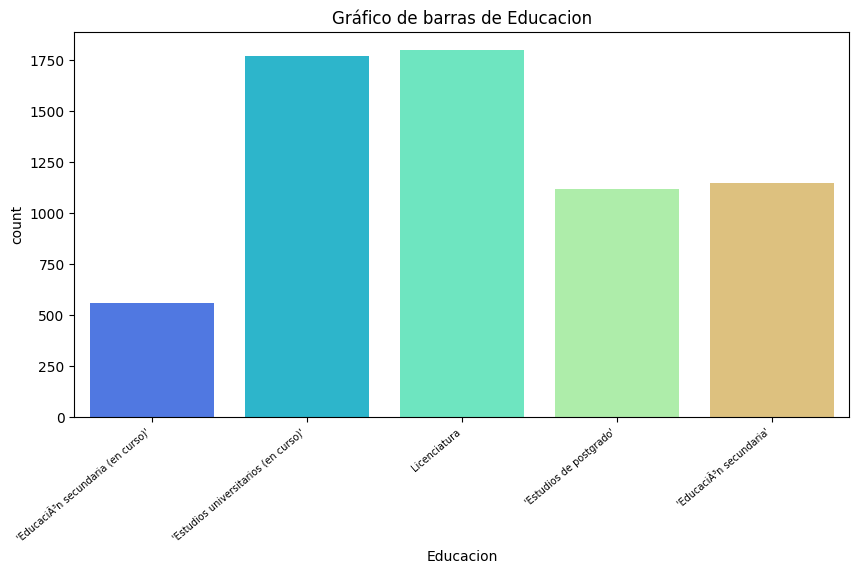

In [ ]:
sns.set_palette("rainbow")
fig,ax = plt.subplots(figsize=(10,5))

sns.countplot(x ='Educacion', data = data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = '7')


ax.title.set_text("Gráfico de barras de Educacion")

In [ ]:
data.Educacion.value_counts()*100

Licenciatura                            180000
'Estudios universitarios (en curso)'    177400
'EducaciÃ³n secundaria'                 115000
'Estudios de postgrado'                 111900
'EducaciÃ³n secundaria (en curso)'       55700
Name: Educacion, dtype: int64

Se puede observar que es pequeño el porcentaje de observaciones que aún no finalizaron sus estudios secundarios. Por otro lado, más del 50% de las observaciones cuentan con estudios académicos ya finalizados o en curso (Licenciatura, Estudios universitarios en curso).  

### Ocupación
Variable cualitativa categórica

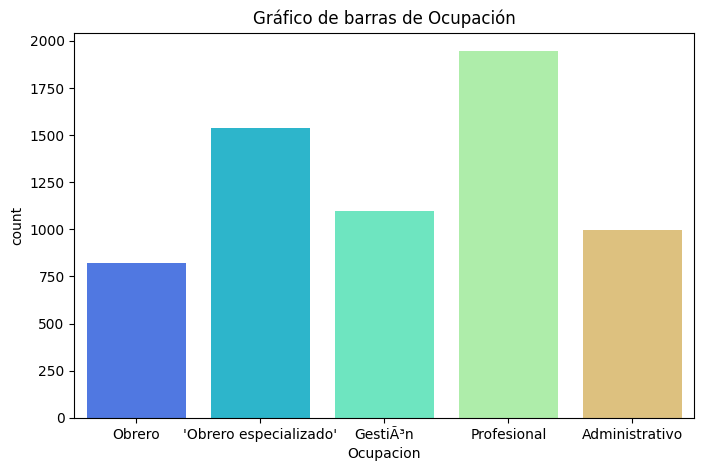

In [ ]:
sns.set_palette("rainbow")
fig,ax = plt.subplots(figsize=(8,5))

sns.countplot(x ='Ocupacion', data = data)

#titulo
ax.title.set_text("Gráfico de barras de Ocupación")

In [ ]:
data.Ocupacion.value_counts(normalize = True)*100

Profesional               30.406250
'Obrero especializado'    24.015625
GestiÃ³n                  17.156250
Administrativo            15.593750
Obrero                    12.828125
Name: Ocupacion, dtype: float64

Este gráfico muestra que la mayoría de las personas son profesionales, seguido de una gran cantidad de obreros especializados. Entre los dos forman un poco más del 50% de las observaciones.
Las demás ocupaciones tienen cantidades similares y no superan el 18% cada una.

### Distancia
Variable cualitativa categórica

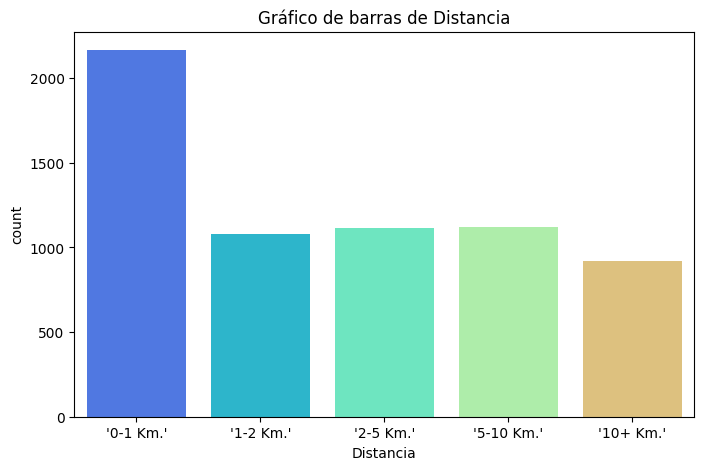

In [ ]:
sns.set_palette("rainbow")
fig,ax = plt.subplots(figsize=(8,5))

sns.countplot(data = data,x ='Distancia',order = ["'0-1 Km.'", "'1-2 Km.'","'2-5 Km.'","'5-10 Km.'","'10+ Km.'"])

#titulo
ax.title.set_text("Gráfico de barras de Distancia")

In [ ]:
data.Distancia.value_counts(normalize = True)*100

'0-1 Km.'     33.84375
'5-10 Km.'    17.53125
'2-5 Km.'     17.40625
'1-2 Km.'     16.87500
'10+ Km.'     14.34375
Name: Distancia, dtype: float64

Este gráfico describe la proporción de la población en función de la distancia a su respectivo trabajo. Se puede observar que la poblacion de 1-2 km, 2-5 km, 5-10 km son relativamente homogéneas.
La población que está más cerca del trabajo es la mayor.

### Región
Variable cualitativa categórica

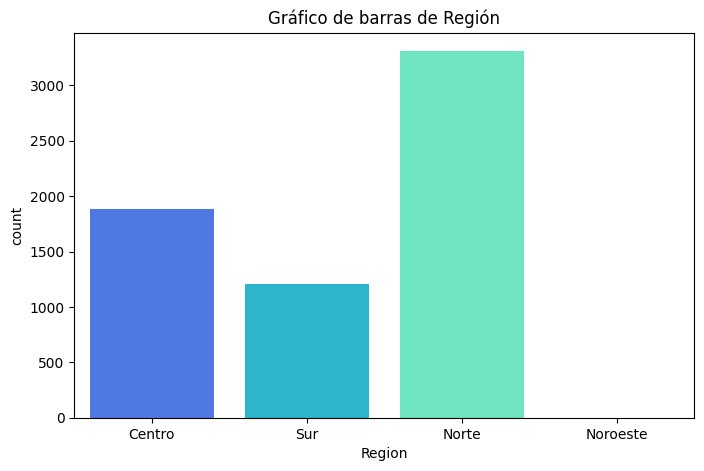

In [ ]:
sns.set_palette("rainbow")

fig,ax = plt.subplots(figsize=(8,5))

sns.countplot(x ='Region', data = data)

#titulo
ax.title.set_text("Gráfico de barras de Región")

In [ ]:
data.Region.value_counts()


Norte       3310
Centro      1880
Sur         1209
Noroeste       1
Name: Region, dtype: int64

In [ ]:
data.Region.value_counts(normalize = True)*100

Norte       51.718750
Centro      29.375000
Sur         18.890625
Noroeste     0.015625
Name: Region, dtype: float64

Este gráfico representa la proporción de la población en función de la zona  en la que residen. A partir de éste, se puede observar que aproximadamente más del 50% de los clientes se alojan en el Norte.
En el otro 50% predomina la población de clientes del centro y sólo uno de los clientes se encuentra en el Noroeste.

### ComproBicicleta
Variable cualitativa categórica

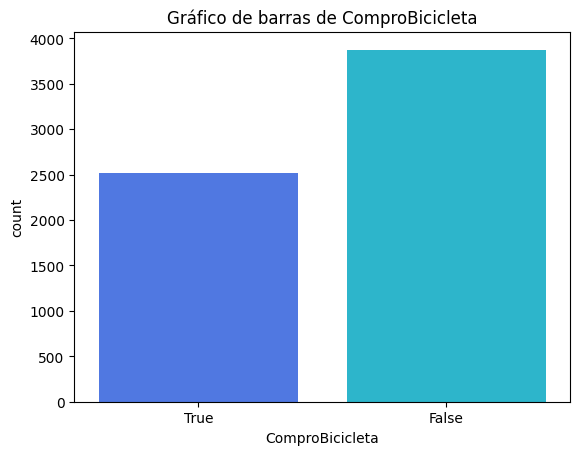

In [ ]:
sns.set_palette("rainbow")

fig,ax = plt.subplots()

sns.countplot(x ='ComproBicicleta', data = data)

#titulo
ax.title.set_text("Gráfico de barras de ComproBicicleta")

In [ ]:
data.ComproBicicleta.value_counts(normalize = True)*100

False    60.5625
True     39.4375
Name: ComproBicicleta, dtype: float64

* 0: Indica que no compro bicicleta.
* 1: Indica que compraron alguna vez bicicleta.


A partir del gráfico y análisis se puede demuestrar que aproximadamente el 60% de los clientes no compraron alguna vez una bicicleta.

### Propietario
Variable cualitativa categórica

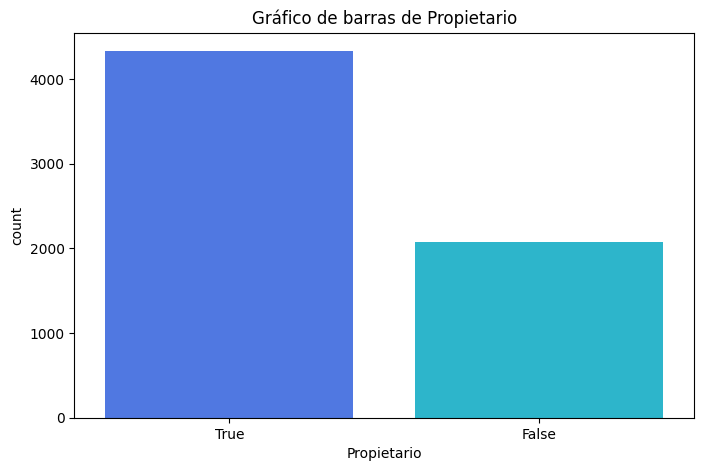

In [ ]:
sns.set_palette("rainbow")

fig,ax = plt.subplots(figsize=(8,5))

sns.countplot(x ='Propietario', data = data)

#titulo
ax.title.set_text("Gráfico de barras de Propietario")

In [ ]:
data.Propietario.value_counts(normalize = True)*100

True     67.65625
False    32.34375
Name: Propietario, dtype: float64

Aproximadamente el 67% de los clientes son propietarios.

### IngresoAnual
Variable cuantitativa continua

Al ser una variable cuantitativa utilizaremos un histograma y un boxplot para graficarlos y realizar los análisis.

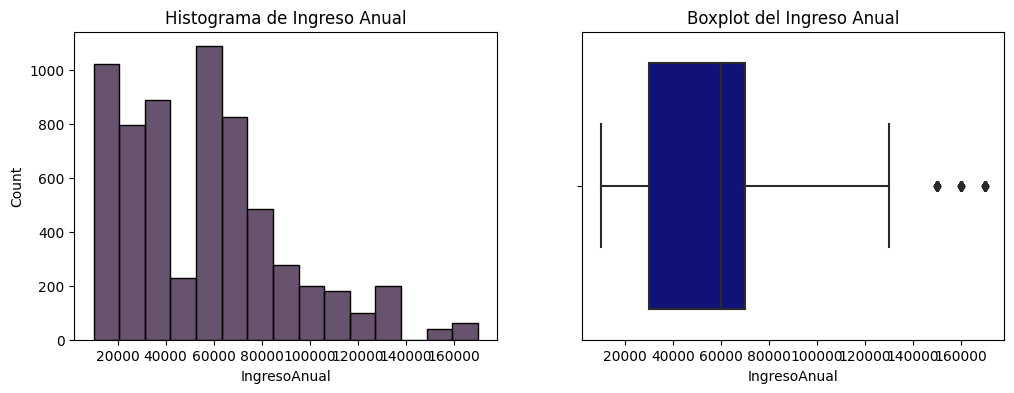

In [ ]:
sns.set_palette("rocket")
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=data, x="IngresoAnual", ax=ax[0], bins=15)

ax[0].title.set_text("Histograma de Ingreso Anual")

sns.boxplot(data=data, x="IngresoAnual", ax=ax[1], color="darkblue")

ax[1].title.set_text("Boxplot del Ingreso Anual")

plt.show()

In [ ]:
data.IngresoAnual.describe()

count      6390.000000
mean      57532.081377
std       32331.969091
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: IngresoAnual, dtype: float64

En base al histograma y al boxplot podemos observar que el 50% de los clientes tienen un ingreso anual entre 30000 y 70000.
Se visualizan 3 outliers que consideraremos más adelante.

### Total Hijos
Variable cuantitativa discreta

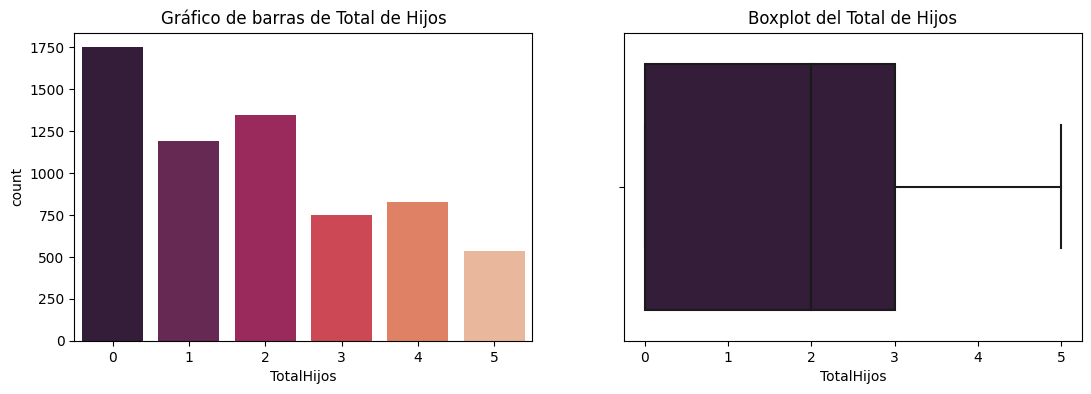

In [ ]:
sns.set_palette("rocket")
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

sns.countplot(data=data, x="TotalHijos", ax=ax[0])

ax[0].title.set_text("Gráfico de barras de Total de Hijos")

sns.boxplot(data=data, x="TotalHijos", ax=ax[1])

ax[1].title.set_text("Boxplot del Total de Hijos")

plt.show()

In [ ]:
data.TotalHijos.value_counts(normalize = True)*100

0    27.343750
2    21.015625
1    18.609375
4    12.937500
3    11.687500
5     8.406250
Name: TotalHijos, dtype: float64

In [ ]:
data.TotalHijos.describe()

count    6400.000000
mean        1.894844
std         1.630993
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: TotalHijos, dtype: float64

Aproxidamante el 30% de los clientes no tienen hijos, y el 50% de las observaciones tienen entre 0 y 3 hijos (Q1 y Q3). Estos datos serán relevantes más adelante para determinar a quíen mandar promociones de las bicicletas Kinder.

### Cantidad de Automóviles
Variable cuantitativa discreta

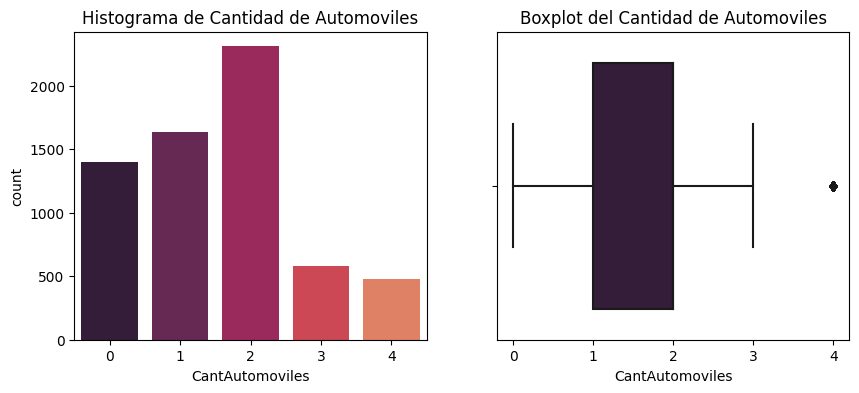

In [ ]:
sns.set_palette("rocket")
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=data, x="CantAutomoviles", ax=ax[0])

ax[0].title.set_text("Histograma de Cantidad de Automoviles")

sns.boxplot(data=data, x="CantAutomoviles", ax=ax[1])

ax[1].title.set_text("Boxplot del Cantidad de Automoviles")

plt.show()

In [ ]:
data.CantAutomoviles.value_counts(normalize=True)*100

2    36.062500
1    25.546875
0    21.859375
3     9.031250
4     7.500000
Name: CantAutomoviles, dtype: float64

In [ ]:
data.CantAutomoviles.describe()

count    6400.000000
mean        1.547656
std         1.147060
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: CantAutomoviles, dtype: float64

Se observa que aproximadamente el 36% de las observaciones tienen 2 vehiculos. Mas del 50% de los clientes tienen entre 1 y 2 automoviles, aunque hay mas del 20% que no tienen ninguno. En el gráfico de barras y en el Box Plot se observa que la mediana es de 2 autos.

### Edad
Se trata de una variable cuantitativa discreta

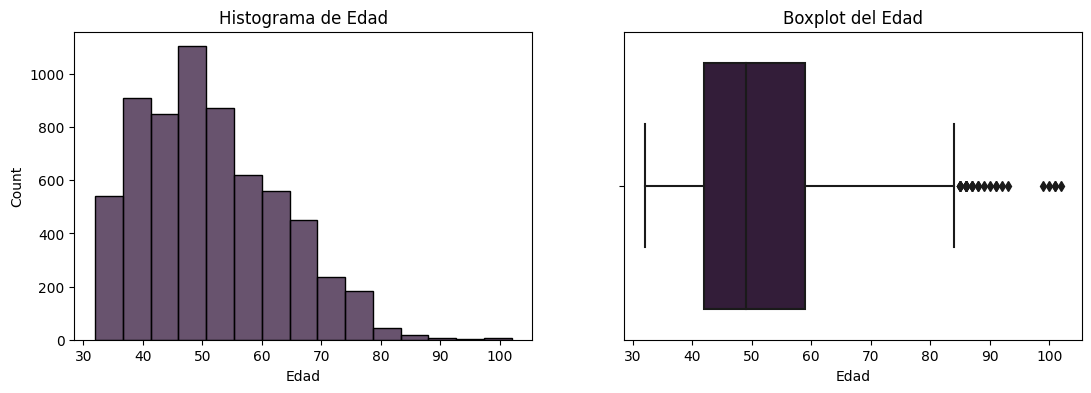

In [ ]:
sns.set_palette("rocket")
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

sns.histplot(data=data, x="Edad", ax=ax[0], bins =15 )

ax[0].title.set_text("Histograma de Edad")

sns.boxplot(data=data, x="Edad", ax=ax[1])

ax[1].title.set_text("Boxplot del Edad")

plt.show()

In [ ]:
data.Edad.describe()

count    6400.000000
mean       51.195469
std        11.517698
min        32.000000
25%        42.000000
50%        49.000000
75%        59.000000
max       102.000000
Name: Edad, dtype: float64

El histograma es asimétrico a la derecha. El 50% de las observaciones tienen entre 42 y 59 años (en base a los cuartiles Q1 y Q3). En el Boxplot se obervan varios valores anómalos.
Desde los 70 años de edad en adelante decrece la cantidad de clientes. No hay clientes menores de 32 años.

# Análisis Exploratorio Multivariante de los Datos

Vamos a analizar en conjunto las siguientes variables:

* Edad vs Compro bicicleta
* Edad vs Ingreso Anual
* Edad vs Ocupacion
* Edad vs Distancia
* Ingreso Anual vs Compro bicicleta
* Ingreso Anual vs Ocupacion
* Total Hijos vs Compro bicicleta
* Total Hijos vs Estado Civil
* Cantidad Automóviles vs Compro bicicleta
* Región vs Compro bicicleta
* Distancia vs Compro bicicleta
* Distancia vs Cantidad de Automoviles
* Cantidad de autos vs Ingreso Anual vs Compro bicicleta
* Cantidad de autos vs Total hijos vs Compro bicicleta
* Distancia vs Ocupación vs Compro bicicleta





### Edad vs Compro Bicicleta

Al ser una variable numérica y una cualitativa, utilizaremos un histograma de color junto a boxplots para representarlas.

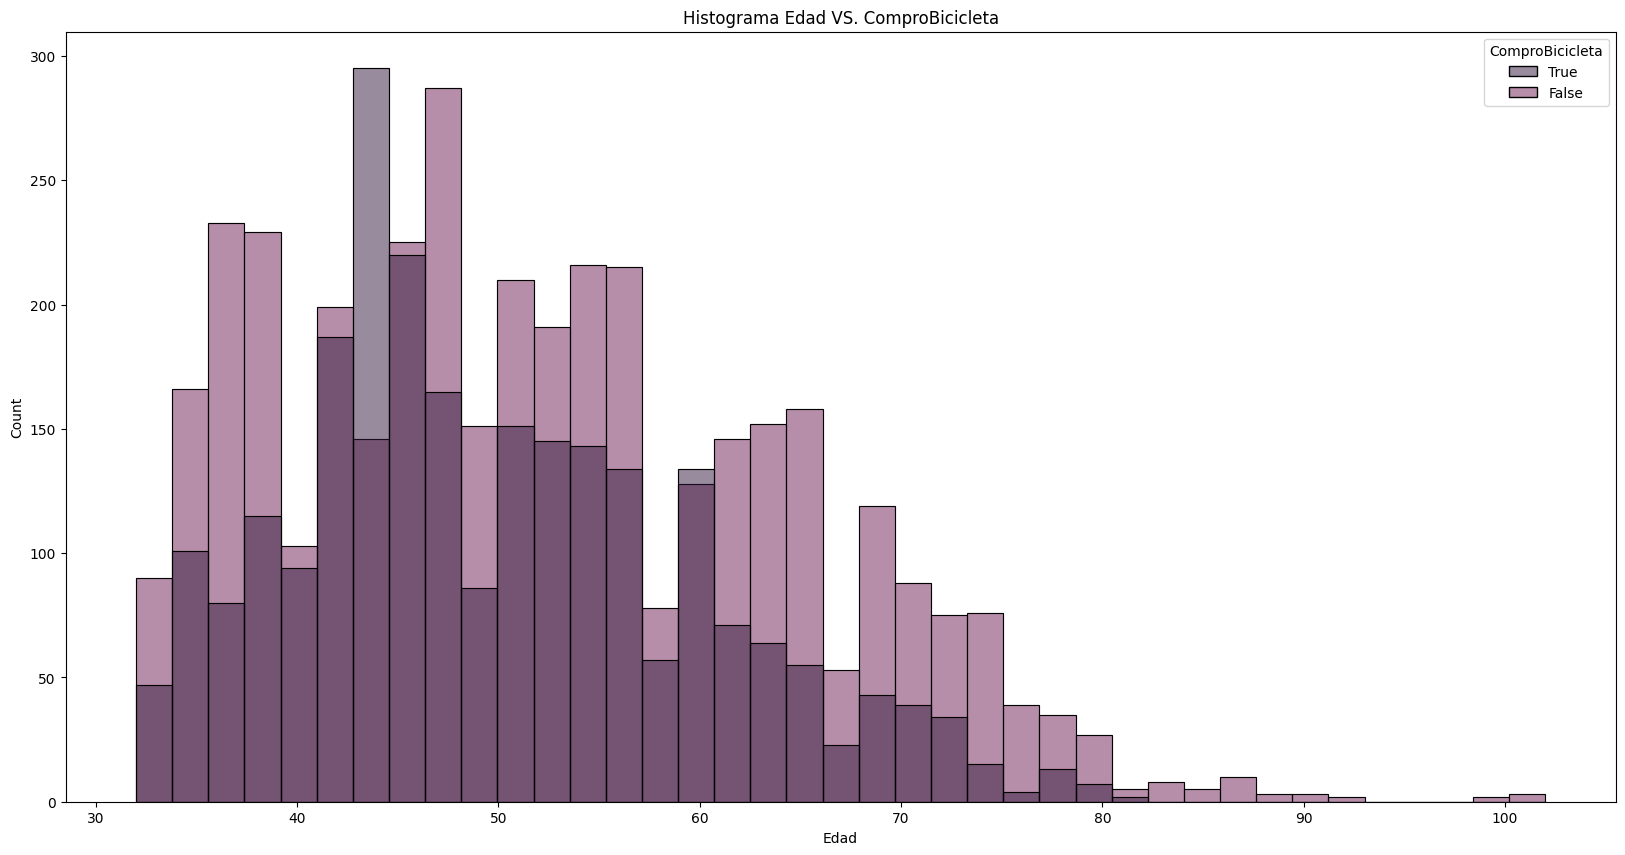

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="Edad", hue="ComproBicicleta",ax=ax)
ax.set_title("Histograma Edad VS. ComproBicicleta")
fig.set_size_inches(20, 10)

plt.show()

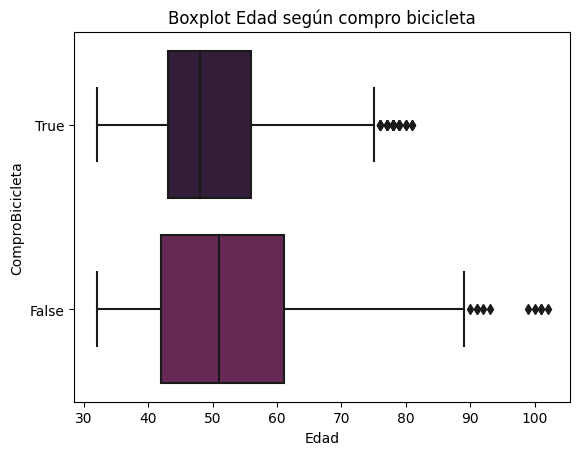

In [ ]:
sns.boxplot(data=data, x="Edad", y="ComproBicicleta")
plt.title("Boxplot Edad según compro bicicleta")

plt.show()

Donde:

*   True: Indica que si compro bicicleta
*   False: Indica que no compro bicicleta



El 50% de los compradores de bicicletas tienen entre 40 y 55 años. Los que no compran bicicletas tienen un comportamiento similar, el 50% se ubica entre 43 y 60 años. A partir de los 70 años, comienza a disminuir la cantidad de compradores hasta los 80 años donde no hay compradores.

En base a este análisis, consideramos evaluar la variable Edad con la variable Ingreso Anual ya que podría ocurrir que las edades más propensas a comprar bicicletas corresponden a personas con sueldos altos.

### Edad vs Ingreso Anual

Al ser ambas variables numéricas, utilizamos un diagrama de dispersión para representarlas

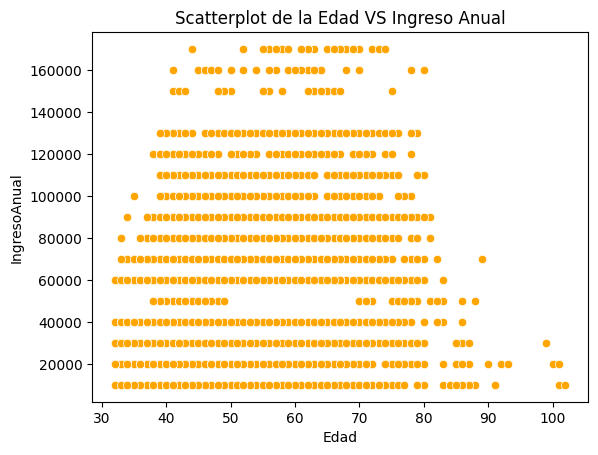

In [ ]:
sns.scatterplot(data=data, x="Edad", y="IngresoAnual", color="orange")

plt.title("Scatterplot de la Edad VS Ingreso Anual")

plt.show()

Aproximadamente a partir de los 85 años la mayoría de las observacion no tiene ingresos mayores a 40000. Esto puede deberse a que las personas mayores son jubiladas. Las personas más jovenes no tienen ingresos superiores a 100000. Los sueldos más altos estan comprendidos en aquellos clientes que tienen entre 40 y 80 años de edad. Esto puede deberse a su ocupación.

### Edad vs Ocupación

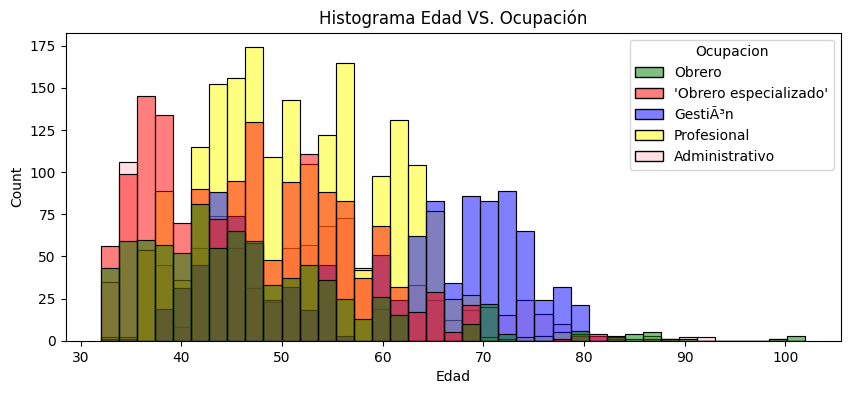

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="Edad", hue="Ocupacion",ax=ax,palette = ["green","red", "blue", "yellow", "pink"])
ax.set_title("Histograma Edad VS. Ocupación")
fig.set_size_inches(10, 4)

plt.show()

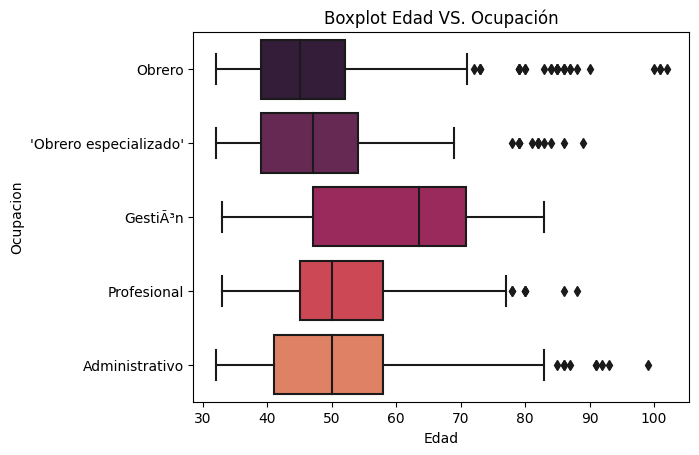

In [ ]:


sns.boxplot(data=data, x="Edad", y="Ocupacion")
plt.title("Boxplot Edad VS. Ocupación")

plt.show()

En el gráfico observamos que aquellas personas jóvenes que tienen sueldos bajos se debe a que su ocupación es Obrero. Quienes tienen los sueldos más altos comprendidos entre los 42 y 65 años aproximadamente se debe a que en su mayoría son Profesionales.

Quienes tienen sueldos medianamente altos y son de mayor edad, tienen ocupaciones de Gestión, que puede deberse a sus años de experiencia tener ese tipo de ocupaciones.

Quienes tienen sueldos medianamente altos y son de menor edad, tienen ocupaciones de Obrero Especializado. Puede deberse a sus años de experiencia como Obrero.

En base a este análisis, consideramos que sera muy interesante relacionar la Ocupación con el Ingreso anual.

### Edad vs Distancia


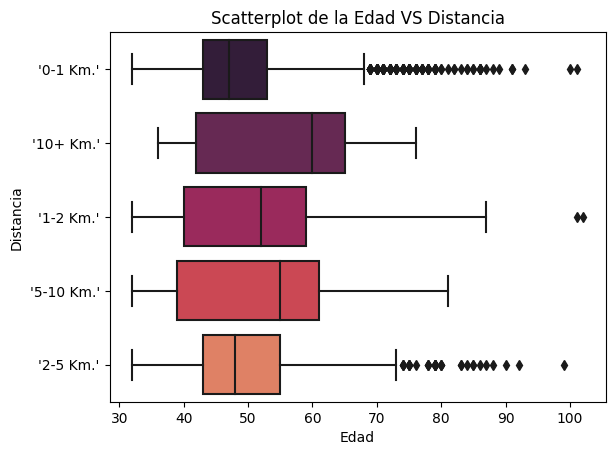

In [ ]:
sns.boxplot(data=data, x="Edad", y="Distancia")
plt.title("Scatterplot de la Edad VS Distancia")

plt.show()

La distribución de los datos es bastante similar. Podemos observar que hay varios outliers en aquellos rangos de menor y mayor distancia.

De todas formas, vemos que la edad no es una variable significativa en cuanto a si las personas mayores o menores prefieren alejarse o no de sus trabajos.

### Ingreso Anual vs Compro Bicicleta

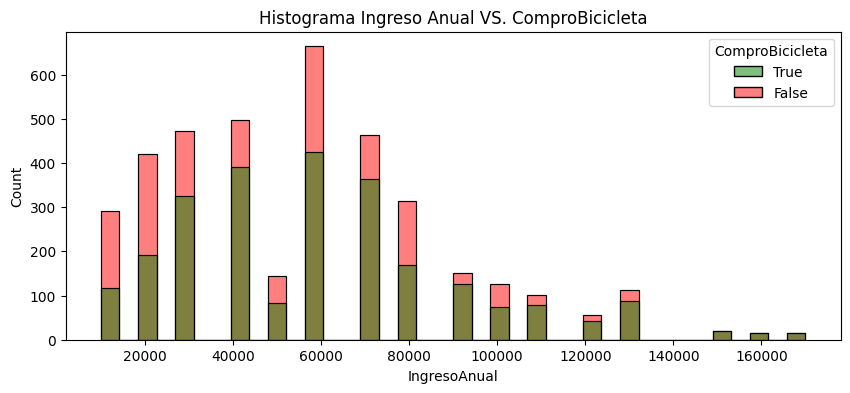

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="IngresoAnual", hue="ComproBicicleta",ax=ax,palette = ["green","red"])
ax.set_title("Histograma Ingreso Anual VS. ComproBicicleta")
fig.set_size_inches(10, 4)

plt.show()

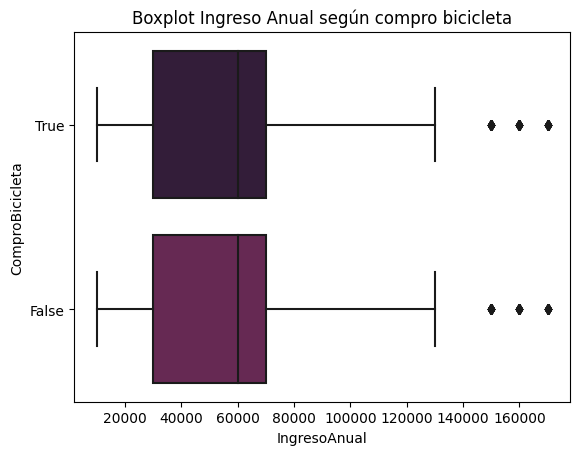

In [ ]:
sns.boxplot(data=data, x="IngresoAnual", y="ComproBicicleta")
plt.title("Boxplot Ingreso Anual según compro bicicleta")

plt.show()

Podemos observar que mientras más aumenta el ingreso anual de las personas, mayor es la probabilidad de que se compren una bicicleta.
Los boxplots se ven similares porque la distribución tanto de la compra o no de las bicicletas essimilar.
Se observan outliers.

### Ingreso Anual vs Ocupación

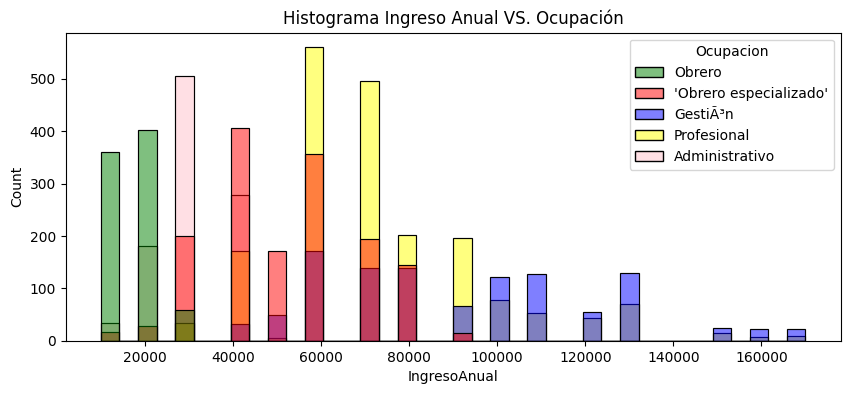

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="IngresoAnual", hue="Ocupacion",ax=ax,palette = ["green","red", "blue", "yellow", "pink"])
ax.set_title("Histograma Ingreso Anual VS. Ocupación")
fig.set_size_inches(10, 4)

plt.show()

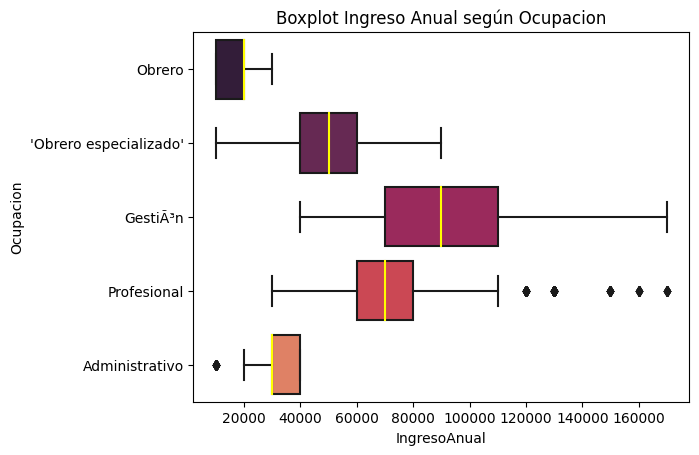

In [ ]:
sns.boxplot(data=data, x="IngresoAnual", y="Ocupacion", medianprops={"color": "yellow"})
plt.title("Boxplot Ingreso Anual según Ocupacion")

plt.show()

Observamos en la gráfica de Edad VS Ocupación que las personas mayores eran las que desarrollaban ocupaciones de Gestión, y a la vez, en la grafica de Edad VS Compro Bicicleta, que estas personas no eran tan propensas a comprar bicicletas.

Las personas más propensas a comprar bicicletas, tenian entre 40 y 55 años, y estos en su mayoría eran profesionales, obreros u obreros especializados.

Esto nos hace ver que los más jóvenes, y con sueldos medianamente buenos (ni muy bajos ni muy altos), son personas más propensas a comprar bicicletas.

### Total Hijos vs Compro Bicicleta

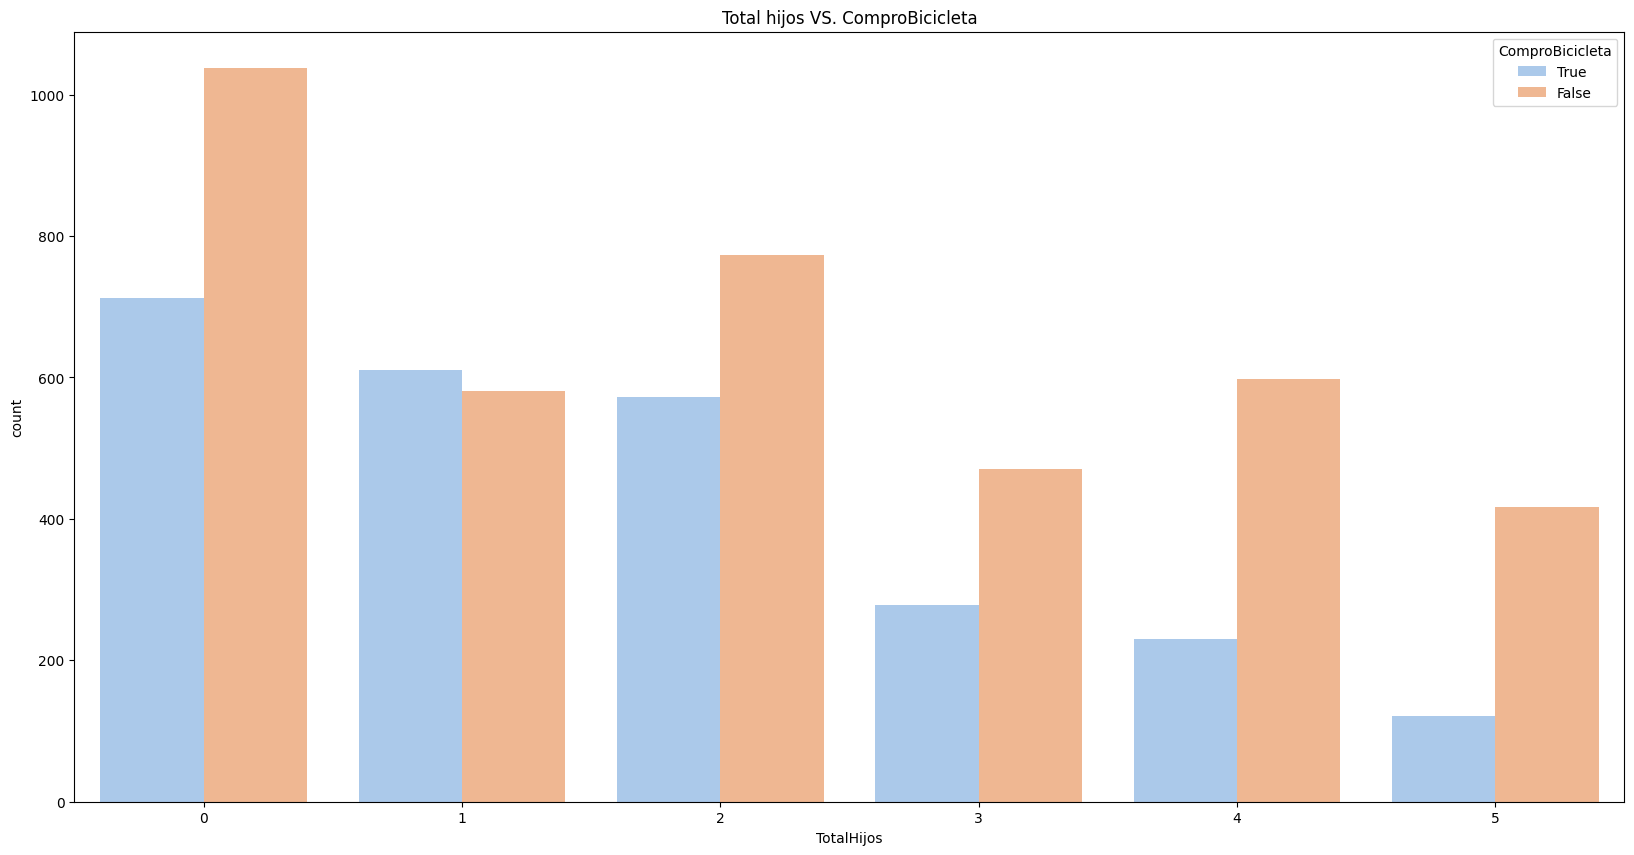

In [ ]:
fig,ax = plt.subplots()

sns.countplot(data=data, x="TotalHijos", hue="ComproBicicleta", palette="pastel",ax=ax)
ax.set_title("Total hijos VS. ComproBicicleta")
fig.set_size_inches(20, 10)

plt.show()

Donde:
*   True: Indica que si compro bicicleta
*   False: Indica que no compro bicicleta


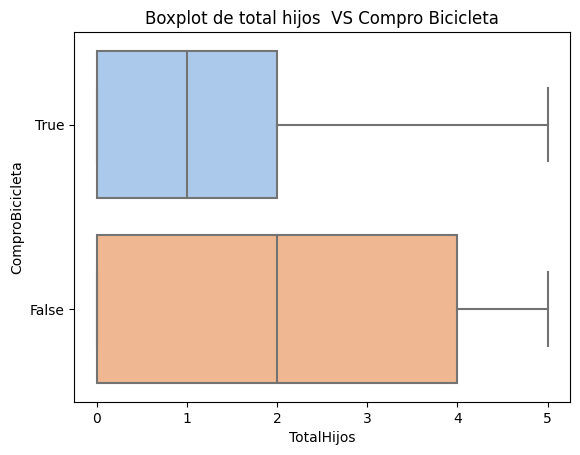

In [ ]:
sns.boxplot(data=data, x="TotalHijos", y="ComproBicicleta",palette="pastel")
plt.title("Boxplot de total hijos  VS Compro Bicicleta")

plt.show()

El 50% de los que compraron bicicletas tienen entre 0 y 2 hijos.
El 50% de los que no compraron bicicletas tienen entre 0 y 4 hijos.
Esto tambien puede deberse a que aquellos que tienen mas hijos, pueden compartir la bicicleta de sus hermanos.

Seria interesante analizar quienes tienen menos hijos, si los clientes casados o solteros.

### Total Hijos vs Estado Civil

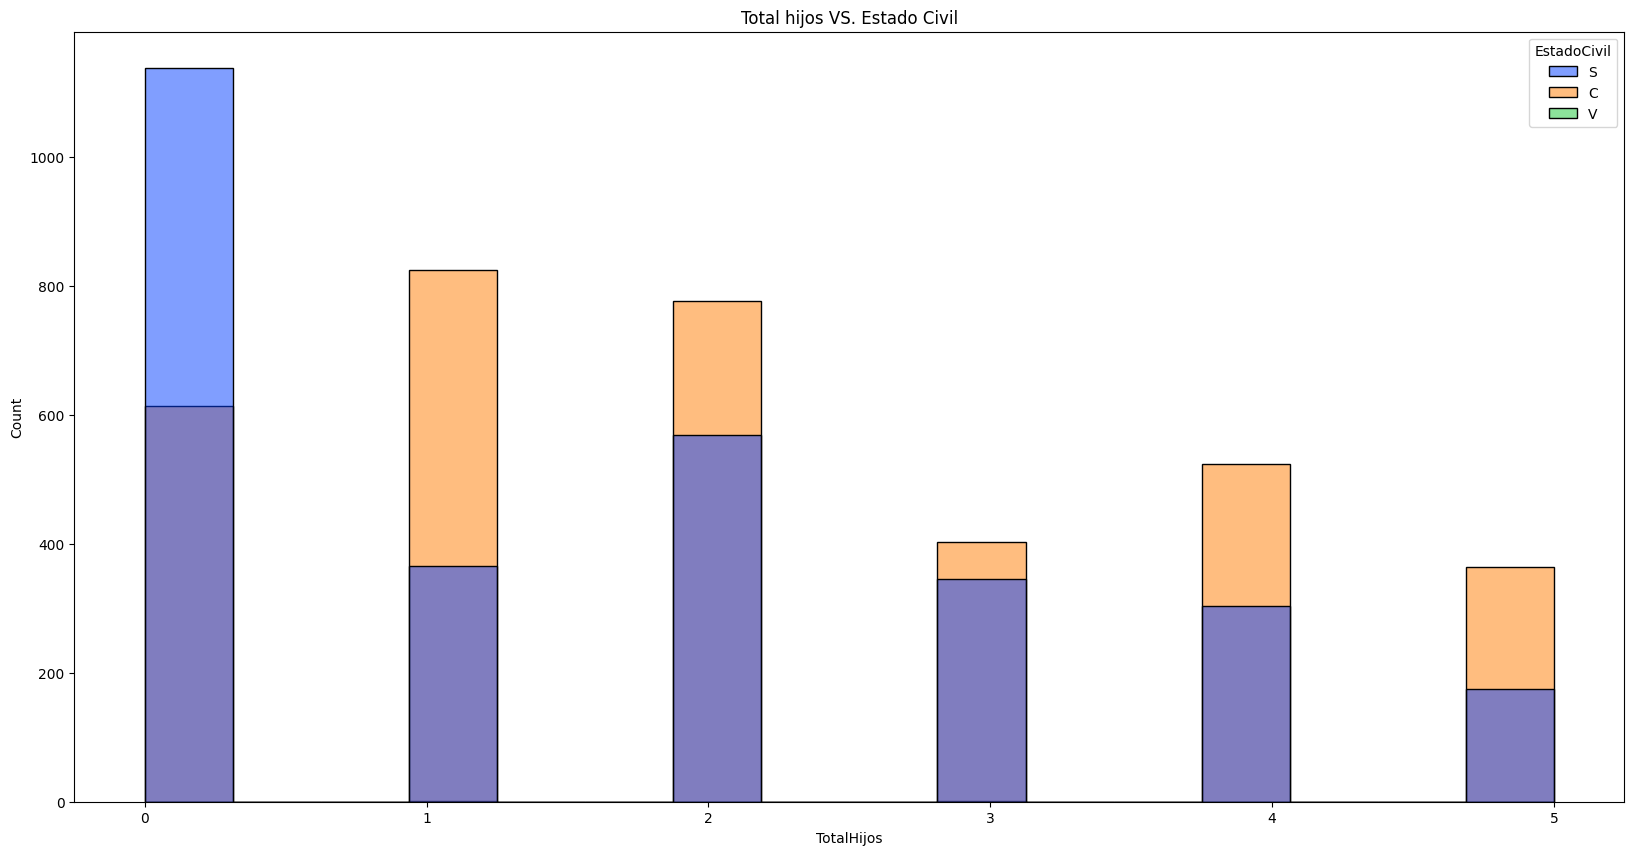

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="TotalHijos", hue="EstadoCivil", palette="bright",ax=ax)
ax.set_title("Total hijos VS. Estado Civil")
fig.set_size_inches(20, 10)

plt.show()

Aquellas personas casadas (Estado Civil=Casado), suelen tener más hijos, y en el gráfico anterior vimos que las personas con menos cantidad de hijos eran más propensas a comprar bicicletas, por lo que esta información es de gran valor. Hay una observación correspodiente a estado civil viudo para 1 y 3 hijos

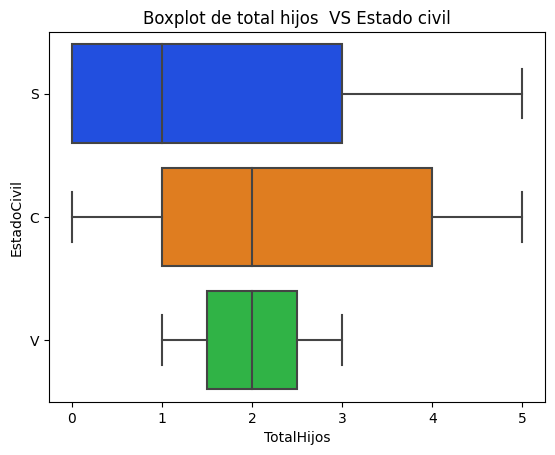

In [ ]:
sns.boxplot(data=data, x="TotalHijos", y="EstadoCivil",palette="bright")
plt.title("Boxplot de total hijos  VS Estado civil")

plt.show()

El Boxplot nos muestra que el 50% de las observaciones de los solteros tienen entre 0 y 3 hijos, donde la mediana es 1 hijo.

El 50% de las observaciones de los casados tienen entre 1 y 4 hijos.

Hay 2 observaciones de viudos de los cuáles uno tiene 1 hijo y el otro 3 hijos.

### Cantidad de Automoviles vs Compro Bicicleta

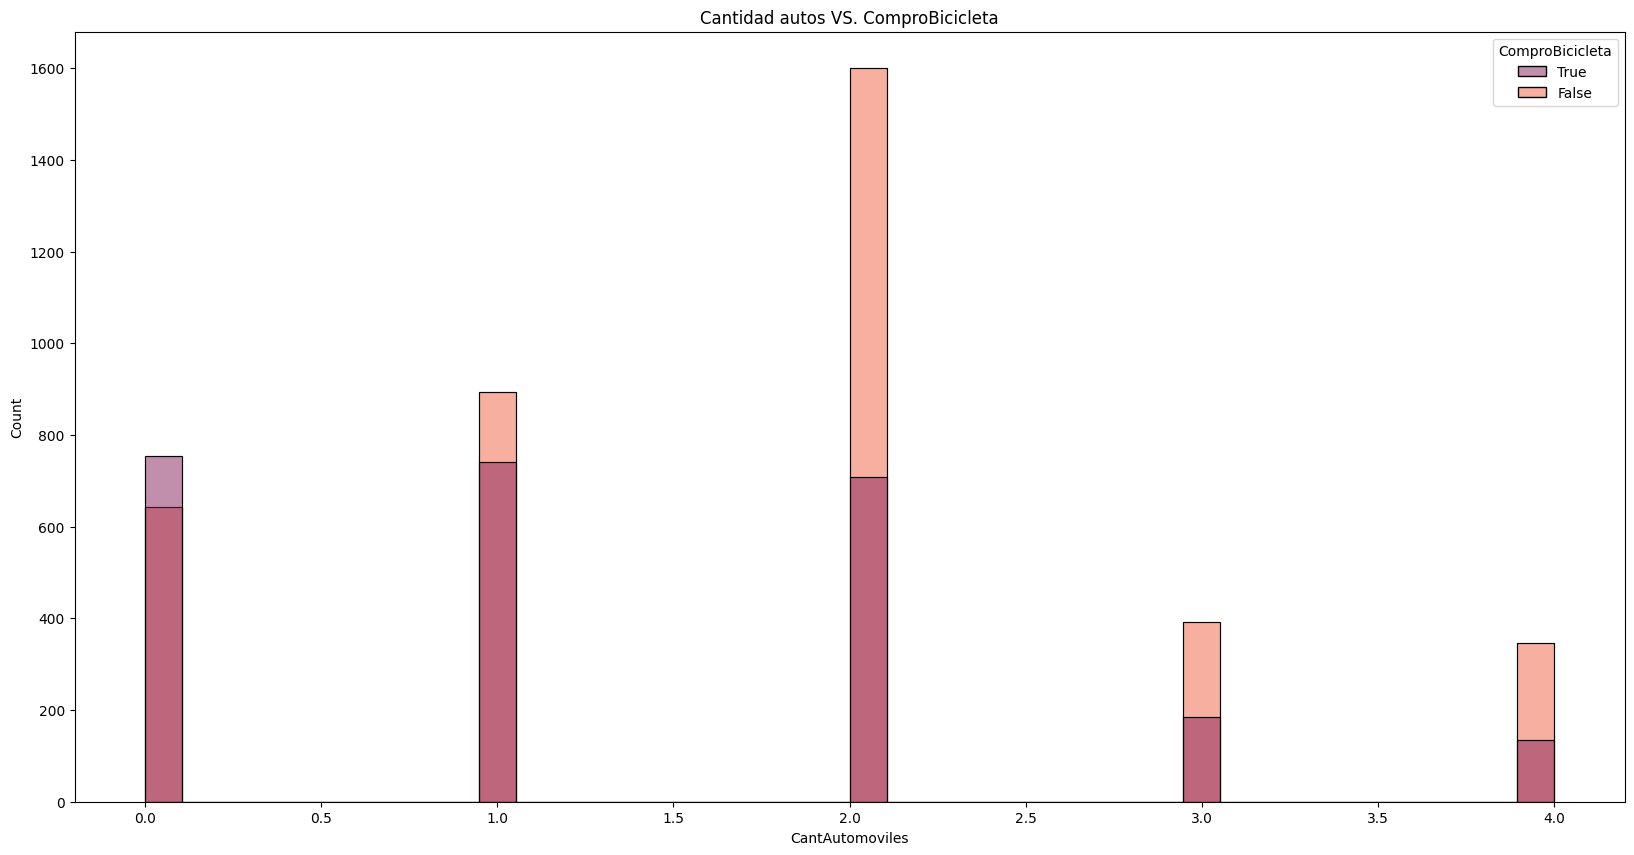

In [ ]:
fig,ax = plt.subplots()

sns.histplot(data=data, x="CantAutomoviles", hue="ComproBicicleta", palette="rocket",ax=ax)
ax.set_title("Cantidad autos VS. ComproBicicleta")
fig.set_size_inches(20, 10)

plt.show()

Donde:
*   True: Indica que si compro bicicleta
*   False: Indica que no compro bicicleta

Se observa que es mas propenso a comprar una bicicleta una persona que no tiene automóvil. Desde que tienen 2 automóviles ya son menos propensos a comprarla.

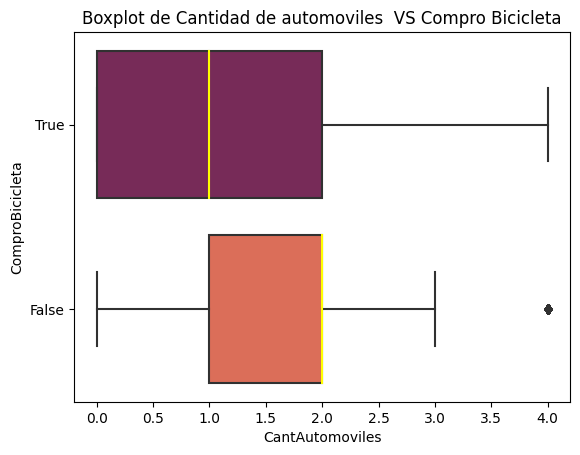

In [ ]:
sns.boxplot(data=data, x="CantAutomoviles", y="ComproBicicleta",palette="rocket", medianprops={"color": "yellow"})
plt.title("Boxplot de Cantidad de automoviles  VS Compro Bicicleta")

plt.show()

Los boxplot nos muestran a la vez que 50% de los que compraron bicicletas tienen entre 0 y 2 autos y que al no tener auto, un cliente es mucho más propenso a comprar una bicicleta.


### Region vs Compro Bicicleta

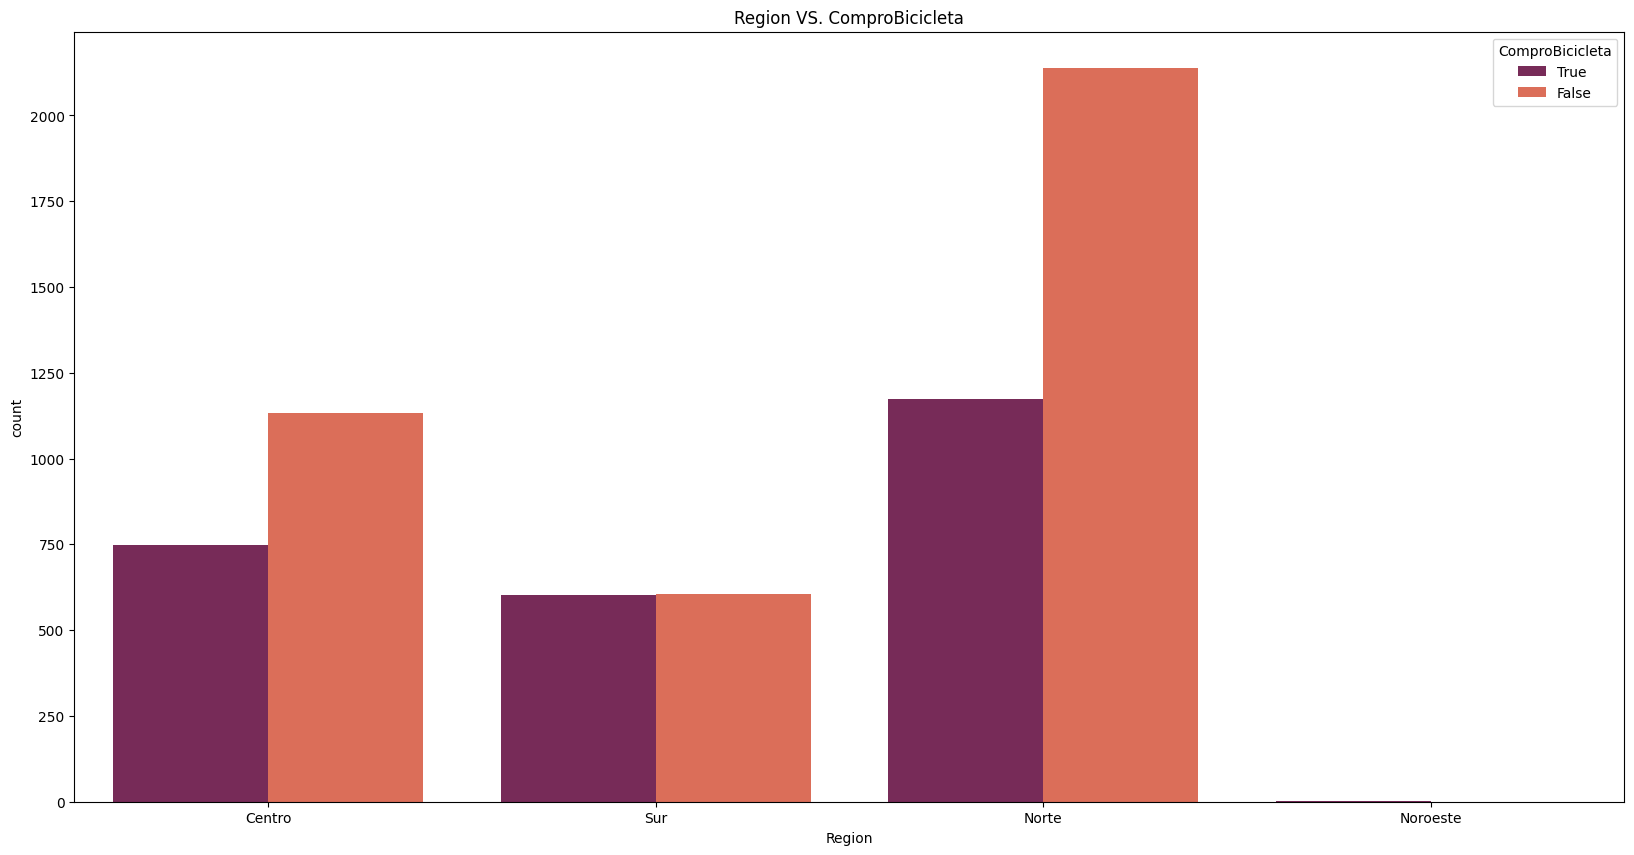

In [ ]:

fig,ax = plt.subplots()

sns.countplot(data=data, x="Region", hue="ComproBicicleta", palette="rocket",ax=ax)
ax.set_title("Region VS. ComproBicicleta")
ax.set_xticklabels(ax.get_xticklabels(),fontsize = '10')
fig.set_size_inches(20, 10)

plt.show()

Donde:
*   True: Indica que si compro bicicleta
*   False: Indica que no compro bicicleta

Se observa que en el norte del país las personas no son propensas comprar bicicletas, caso contrario se da en el Sur.

### Distancia vs Compro Bicicleta

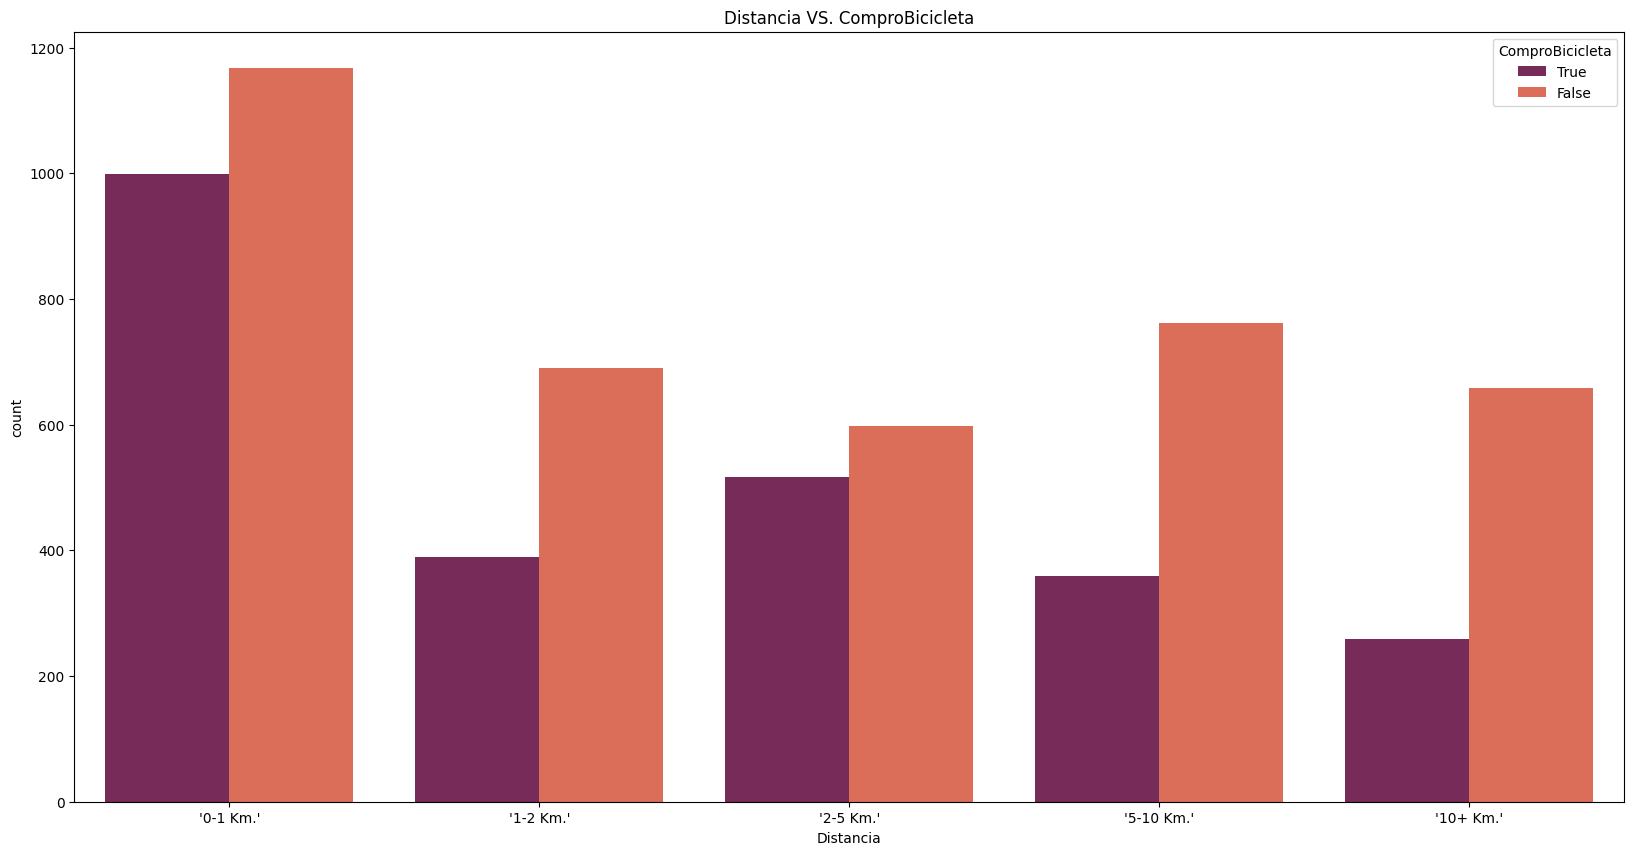

In [ ]:
fig,ax = plt.subplots()

sns.countplot(data=data, x="Distancia", hue="ComproBicicleta", palette="rocket",ax=ax,order=["'0-1 Km.'","'1-2 Km.'","'2-5 Km.'","'5-10 Km.'","'10+ Km.'"])
ax.set_title("Distancia VS. ComproBicicleta")
fig.set_size_inches(20, 10)

plt.show()

Donde:
*   True: Indica que si compro bicicleta
*   False: Indica que no compro bicicleta

Se puede observar que mientras más lejos es la distancia a la que viven las personas, disminuye la cantidad de personan que compraron bicicletas. Es probable que estas personas tengan automóviles o usen otro medio de transporte para llegar al trabajo debido a la distancia. Haremos el análisis en la siguiente gráfica.

### Distancia vs Cantidad de Automoviles

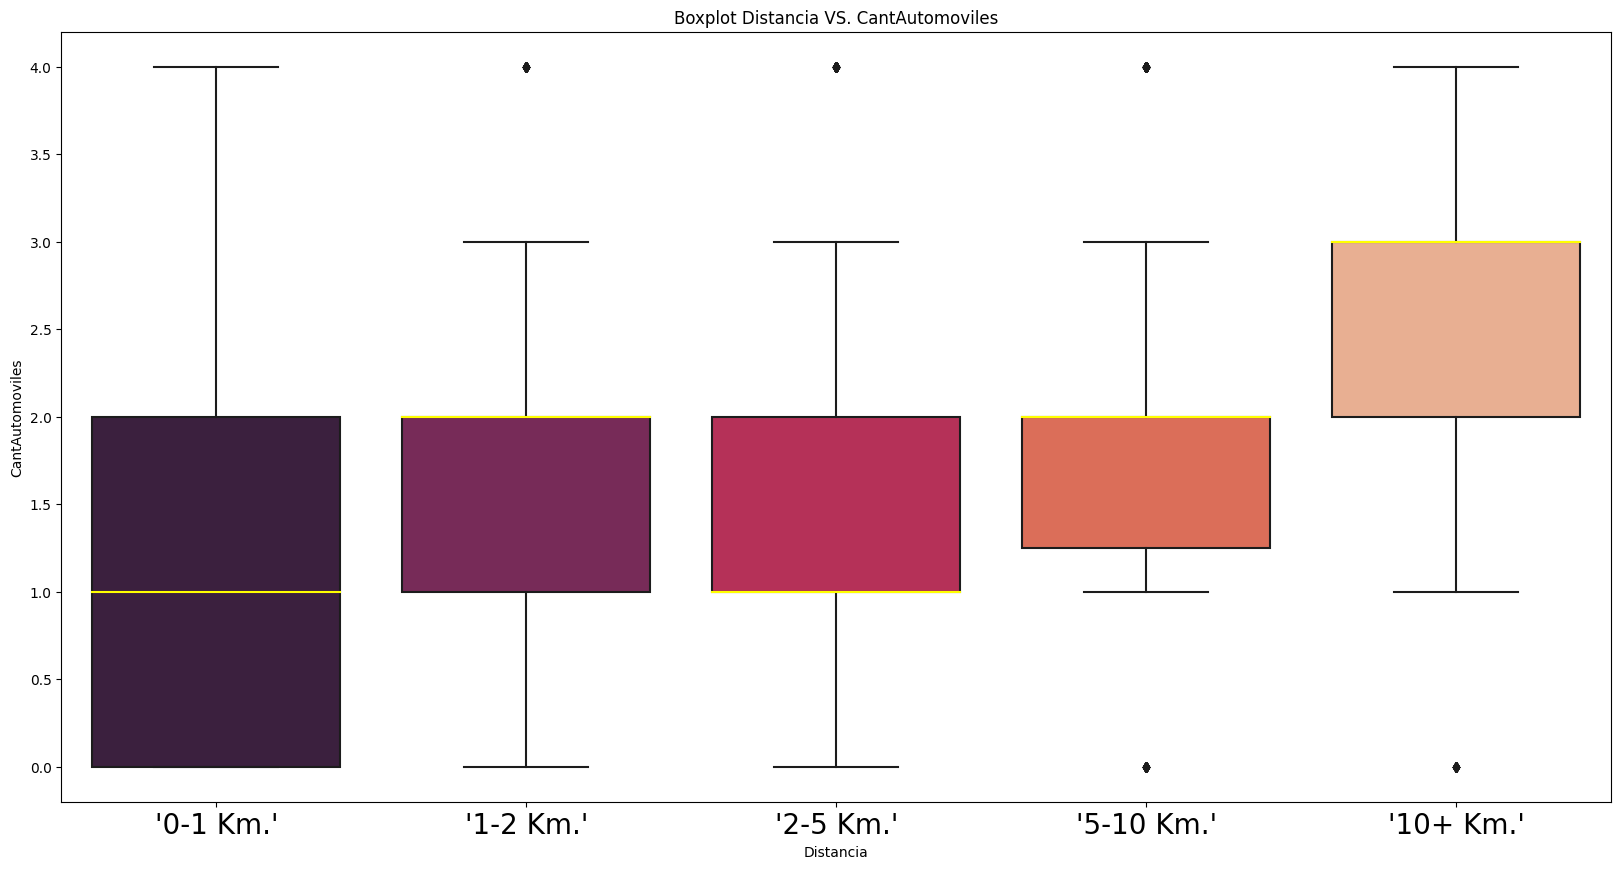

In [ ]:
fig,ax = plt.subplots()

sns.boxplot(data=data, x="Distancia", y="CantAutomoviles", palette="rocket",order=["'0-1 Km.'","'1-2 Km.'","'2-5 Km.'","'5-10 Km.'","'10+ Km.'"], medianprops={"color": "yellow"})
ax.set_title("Boxplot Distancia VS. CantAutomoviles")
ax.set_xticklabels(ax.get_xticklabels(),fontsize = '20')
fig.set_size_inches(20, 10)

plt.show()

AttributeError: ignored

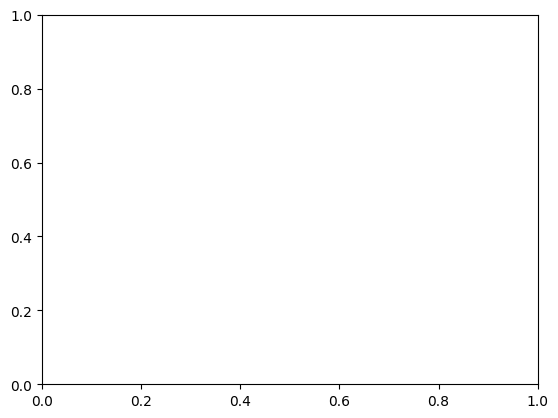

In [ ]:
fig,ax = plt.subplots()

sns.countplot(data=data, x="CantAutomoviles", hue="Distancia", palette="rocket",order=["'0-1 Km.'","'1-2 Km.'","'2-5 Km.'","'5-10 Km.'","'10+ Km.'"], medianprops={"color": "yellow"})
ax.set_title("Distancia VS. CantAutomoviles")
fig.set_size_inches(20, 10)

plt.show()

Se puede observar que quienes viven a distancias mayores a 5Km tienen un vehículo o más, y la mayoría de quienes están más cerca no tienen, o como mucho tienen 2 vehículos.


### Cantidad de automóviles vs Ingreso Anual vs Compro Bicleta

Al ser el análisis de 3 varibales, una numérica y dos cualitativas, utilizaremos un gráfico de dispersión para visualizar la relación

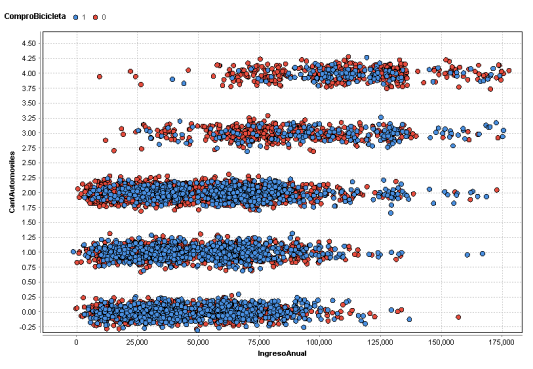

Se puede observar que quienes menos vehículos tienen poseen ingresos en general menores a los 120000, y son mucho mas propensos a comprar bicicletas.

En cambio quienes tienen entre 3 y 4 vehículos, poseen ingresos anuales mayores a 30000 y son propensos a no comprar bicicletas.

### Cantidad de autos VS Total Hijos VS Compro Bicicleta


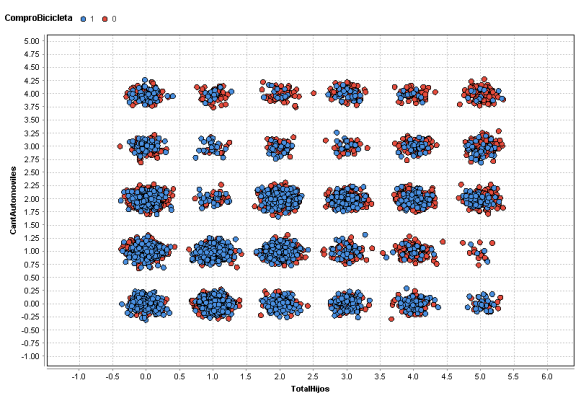

Se puede observar que si se sigue la diagonal desde la esquina inferior izquierda (sin vehículos y sin hijos) hasta las esquina superior derecha (muchos vehículos y muchos hijos) DECRECE la probabilidad de comprar bicicleta.

Este gráfico es muy útil, nos hace pensar tambien que quienes tienen más hijos necesitan un transporte más grande que una bicicleta para poder transportarlos a todos juntos. En cambio quienes tengan un solo hijo o ninguno, con una bicicleta podrian movilizarse.

# Matriz R
### Matriz de Correlación

La Matriz de Correlación muestra la relación lineal entre cada
par de variables, donde un valor cercano a 1 indica una correlación positiva fuerte (es decir, que ambas variables tienden a aumentar o disminuir juntas), un valor cercano a
 -1 indica una correlación negativa fuerte (es decir, que cuando una variable aumenta, la otra tiende a disminuir) y un valor cercano a 0 indica que no hay una correlación lineal significativa entre las variables.

In [ ]:
data.corr()

<ipython-input-69-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IngresoAnual,TotalHijos,CantAutomoviles,Edad
IngresoAnual,1.000000,0.222296,0.469289,0.153101
TotalHijos,0.222296,1.000000,0.272527,0.495425
CantAutomoviles,0.469289,0.272527,1.000000,0.169977
Edad,0.153101,0.495425,0.169977,1.000000


En este caso se puede observar que no hay ninguna relación evidente entre las variables.

# Matriz S
### Matriz de Covarianza

En esta matriz podemos observar que la diagonal principal contiene las distintas varianzas
de cada variable y fuera de la diagonal principal vemos el grado de correlación lineal entre
las variables.Una covarianza de cero indica que no hay relación lineal entre las variables.

A diferencia de la correlación, la covarianza no está normalizada y su magnitud depende de las unidades de las variables involucradas. Esto significa que la covarianza no puede ser utilizada para comparar la fuerza de la relación lineal
entre dos pares de variables que tienen unidades diferentes.

In [ ]:
data.cov()

<ipython-input-70-72e63cb34c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,IngresoAnual,TotalHijos,CantAutomoviles,Edad
IngresoAnual,1.045356e+09,11725.856084,17394.779662,57017.474038
TotalHijos,1.172586e+04,2.660139,0.509857,9.306696
CantAutomoviles,1.739478e+04,0.509857,1.315747,2.245645
Edad,5.701747e+04,9.306696,2.245645,132.657363


# Proceso de Limpieza de Datos  
En esta seccion vamos a analizar aquellas observaciones con valores anómalos o valores nulos en alguna columna y evaluaremos si quitamos esos registros o los reemplazamos por algun valor (por ejemplo la mediana).

## Analisis de la columna Estado Civil

In [ ]:
data.loc[data['EstadoCivil'] == 'V']

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
5494,V,F,70000.0,3,'EducaciÃ³n secundaria',Profesional,True,0,'1-2 Km.',Norte,58,True
6038,V,M,60000.0,1,Licenciatura,Profesional,False,1,'0-1 Km.',Sur,50,True


Decidimos dejar estas dos observaciones en lugar de eliminarlas ya que creemos que no son datos erroneos, ademas la edad de las personas no es un indicador de que no sean posibles compradores de bicicletas.

## Analisis de la Columna Edad

Mostramos los valores de los datos cuyo valor en edad sea mayor a 85 para determinar si puede llegar a haber algún dato erróneo o inesperado

In [ ]:
data.loc[data['Edad'] > 85]

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
336,C,F,10000.0,4,'EducaciÃ³n secundaria',Obrero,False,2,'0-1 Km.',Centro,101,False
516,C,M,10000.0,4,'Estudios universitarios (en curso)',Obrero,False,2,'0-1 Km.',Centro,88,False
571,C,F,10000.0,4,'EducaciÃ³n secundaria (en curso)',Obrero,False,2,'1-2 Km.',Centro,102,False
855,C,F,40000.0,1,Licenciatura,Administrativo,True,0,'0-1 Km.',Centro,86,False
1182,S,M,40000.0,2,'EducaciÃ³n secundaria','Obrero especializado',False,1,'0-1 Km.',Norte,86,False
1407,C,M,30000.0,1,Licenciatura,Administrativo,True,1,'0-1 Km.',Centro,86,False
1460,S,M,20000.0,2,'EducaciÃ³n secundaria (en curso)',Obrero,False,2,'0-1 Km.',Centro,100,False
1499,S,M,50000.0,1,Licenciatura,Profesional,False,1,'0-1 Km.',Sur,86,False
1778,C,M,20000.0,2,'EducaciÃ³n secundaria (en curso)',Obrero,True,1,'1-2 Km.',Centro,101,False
1873,C,F,20000.0,2,Licenciatura,Administrativo,True,1,'2-5 Km.',Centro,92,False


Decidimos conservar los registros, porque podrían ser útiles a la hora de predecir a quién no enviar los correos publicitarios.

## Analisis de la Columna IngresoAnual

Mostramos los datos cuya variable de IngresoAnual era nula para determinar el mejor método para imputar los campos

In [ ]:
ingresosNulos = data['IngresoAnual'].isna()
data[ingresosNulos]

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
61,C,F,NaN,1,Licenciatura,'Obrero especializado',True,1,'0-1 Km.',Norte,44,False
725,S,F,NaN,0,'Estudios de postgrado','Obrero especializado',False,0,'0-1 Km.',Norte,39,False
1205,S,F,NaN,1,Licenciatura,Profesional,True,1,'5-10 Km.',Sur,50,True
2523,S,F,NaN,4,'EducaciÃ³n secundaria',Profesional,False,2,'1-2 Km.',Norte,72,False
3082,C,M,NaN,2,'Estudios universitarios (en curso)',Profesional,True,1,'2-5 Km.',Norte,62,False
4531,S,M,NaN,0,Licenciatura,Profesional,True,3,'10+ Km.',Sur,37,False
4871,C,M,NaN,1,'Estudios de postgrado','Obrero especializado',True,0,'1-2 Km.',Norte,41,False
5264,S,F,NaN,3,'EducaciÃ³n secundaria',Profesional,True,4,'5-10 Km.',Centro,57,True
6018,C,M,NaN,3,'Estudios universitarios (en curso)',Profesional,True,4,'10+ Km.',Centro,58,False
6214,S,F,NaN,2,'EducaciÃ³n secundaria',Obrero,True,0,'0-1 Km.',Centro,43,True


En este caso decidimos imputar la mediana, en lugar de eliminar las observaciones, tomamos esta decision ya que las filas no estan completamente vacias, sino que por alguna razon falta el valor del Ingreso Anual, y si eliminamos la fila completa solo porque falta un valor, estariamos perdiendo informacion.

In [ ]:
data.loc[ingresosNulos, "IngresoAnual"] = data.IngresoAnual.median()
data[ingresosNulos]

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
61,C,F,60000.0,1,Licenciatura,'Obrero especializado',True,1,'0-1 Km.',Norte,44,False
725,S,F,60000.0,0,'Estudios de postgrado','Obrero especializado',False,0,'0-1 Km.',Norte,39,False
1205,S,F,60000.0,1,Licenciatura,Profesional,True,1,'5-10 Km.',Sur,50,True
2523,S,F,60000.0,4,'EducaciÃ³n secundaria',Profesional,False,2,'1-2 Km.',Norte,72,False
3082,C,M,60000.0,2,'Estudios universitarios (en curso)',Profesional,True,1,'2-5 Km.',Norte,62,False
4531,S,M,60000.0,0,Licenciatura,Profesional,True,3,'10+ Km.',Sur,37,False
4871,C,M,60000.0,1,'Estudios de postgrado','Obrero especializado',True,0,'1-2 Km.',Norte,41,False
5264,S,F,60000.0,3,'EducaciÃ³n secundaria',Profesional,True,4,'5-10 Km.',Centro,57,True
6018,C,M,60000.0,3,'Estudios universitarios (en curso)',Profesional,True,4,'10+ Km.',Centro,58,False
6214,S,F,60000.0,2,'EducaciÃ³n secundaria',Obrero,True,0,'0-1 Km.',Centro,43,True


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6400 non-null   object 
 1   Genero           6400 non-null   object 
 2   IngresoAnual     6400 non-null   float64
 3   TotalHijos       6400 non-null   int64  
 4   Educacion        6400 non-null   object 
 5   Ocupacion        6400 non-null   object 
 6   Propietario      6400 non-null   object 
 7   CantAutomoviles  6400 non-null   int64  
 8   Distancia        6400 non-null   object 
 9   Region           6400 non-null   object 
 10  Edad             6400 non-null   int64  
 11  ComproBicicleta  6400 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 600.1+ KB


# Vista Minable

En la vista minable resultante tendremos la variable a predecir "ComproBicicleta" y el resto seran las variables predictoras.

In [ ]:
data.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
0,S,M,10000.0,4,'EducaciÃ³n secundaria (en curso)',Obrero,True,1,'0-1 Km.',Centro,46,True
1,S,M,70000.0,1,'Estudios universitarios (en curso)','Obrero especializado',False,1,'0-1 Km.',Sur,55,True
2,C,F,40000.0,1,Licenciatura,'Obrero especializado',True,1,'0-1 Km.',Centro,39,True
3,C,M,60000.0,3,'Estudios de postgrado',GestiÃ³n,True,2,'10+ Km.',Norte,74,False
4,S,F,60000.0,0,'Estudios universitarios (en curso)','Obrero especializado',False,2,'1-2 Km.',Norte,36,False


Descargamos el archivo con las modificaciones

In [ ]:
data.to_csv(r'clientes_limpio.csv',index=False)

In [ ]:
%%shell
jupyter nbconvert --to PDF /content/DEFINITIVO_Entrega_1_IP.ipynb